## Google Cloud Vision API

- https://yunwoong.tistory.com/148 참조
- 프로그램 설치
    - pip install --upgrade google-cloud-vision

In [1]:
import os, io
from PIL import ImageFont, ImageDraw, Image
from google.cloud import vision
import matplotlib.pyplot as plt

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../static/keys/ocr-project-403207-71dec4109944.json'

client_options = {'api_endpoint': 'eu-vision.googleapis.com'}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [3]:
path = '../static/upload/ocr_test.jpg'
with io.open(path, 'rb') as img_file:
    content = img_file.read()

In [4]:
image = vision.Image(content=content)
 
response = client.text_detection(image=image)
texts = response.text_annotations

In [18]:
if not response.error.message:
    print('nothing')
else:
    print(response.error.message)

nothing


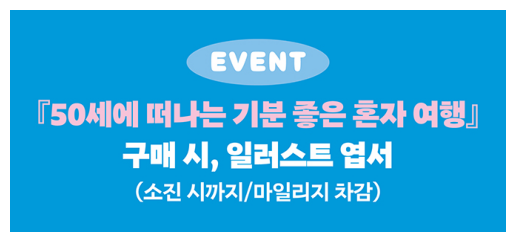

In [11]:

img = Image.open(path)
plt.imshow(img)
plt.axis('off');

In [8]:
# index 0: whole text
print(texts[0].description)

EVENT
『50세에 떠나는 기분 좋은 혼자 여행]
구매 시, 일러스트 엽서
(소진 시까지/마일리지 차감)


In [12]:
draw = ImageDraw.Draw(img)
for i in range(1, len(texts)):
    text = texts[i]
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y
    draw.rectangle(((x1,y1), (x2,y2)), outline=(255,0,0), width=2)
    draw.text((x1+10, y1-20), text.description, 
              font=ImageFont.truetype('malgun.ttf',16), fill=(255,0,0))

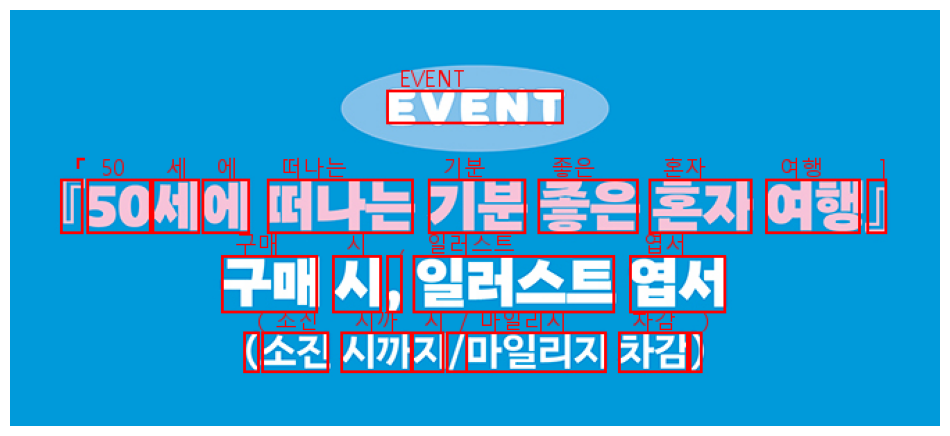

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off');
plt.savefig('../static/img/ocr-result.png', format='png')